# Visualization Techniques in ModelFlow

Upon solving a model in ModelFlow, the outcome are stored  within Pandas dataframes. This document offers an  overview of various 
methodologies for visualizing these results. Within the ecosystem of Python, there exists a plethora of charting libraries, notable examples being [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/), and [bokeh](https://bokeh.org/). These libraries are well-integrated with dataframes, offering seamless interaction.

While users are free to employ any Python-based library for visualization purposes, it is important to note that **ModelFlow furnishes a suite of functions specifically designed for charting results**. These functions are uniquely tailored to comprehend and utilize metadata such as variable descriptions and transformations (like growth rates), which are useful in the analysis of model results.


## Enhancing ModelFlow Charts for Publication

The charts generated by ModelFlow methods like `keep_plot()` or `.plot()` are functional and adequate for basic analysis. However, they might not always meet the high-quality standards required for inclusion in publications or reports. The good news is that these charts are not static; they are highly customizable. Users have the flexibility to modify and enhance these charts, creating more impactful visualizations. Additionally, these refined charts can be saved in various formats, making them suitable for both online and print publications.

It's important to note that the plots produced by ModelFlow are essentially built on the matplotlib package. This means all the functionality of matplotlib is inherently available in ModelFlow. This allows for extensive customization of the standard graphs produced by ModelFlow, leveraging the robust capabilities of matplotlib.

While this chapter provides an introduction to some of matplotlib's features, it barely scratches the surface of what's possible. For those looking to dive deeper and explore the full range of options, the [matplotlib reference](https://matplotlib.org/stable/api/index.html) and numerous guides online can provide useful inspiration.


In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')


In [19]:
# Prepare the notebook for use of modelflow 

# Jupyter magic command to improve the display of charts in the Notebook
%matplotlib inline

# Import pandas 
import pandas as pd

# Import the model class from the modelclass module 
from modelclass import model 

# functions that improve rendering of modelflow outputs
model.widescreen()
model.scroll_off();

<IPython.core.display.Javascript object>

In order to manipulate plots later on matplotlib.pyplot is also imported. 

In [20]:
import matplotlib.pyplot as plt # To manipulate plots 

## Saving results for comparison  


When comparing results the user can take the result dataframe from two (or more)  simulation and use python do the necessary calculations and visualizations. However Modelflow provides some properties and methods which 
facilitates comparing more "out of the box". 

For more how results are stored in instances of the model class please look [here](Saving-results=)

A model instance (in this case  `mpak` provides two  "systems" to do this. The 
 1. **.basedf and .lastdf** dataframes. Which contains the first and the last solution of the model
 2. **.keep_solution** dictionary of dataframes. This is typical used when comparing several scenarios. 
 
### .basedf and .lastdf
In the example above there two dataframes with results ```baseline``` and ```scenario```. These dataframes can be manipulated and visualized
with the tools provided by the **pandas** library and other like **Matplotlib** and **Plotly**. However to make things easy the first and
latest simulation result is also in the mpak object:

- **mpak.basedf**: Dataframe with the values for baseline
- **mpak.lastdf**: Dataframe with the values for alternative  

This means that .basedf and .lastdf will contain the same result after the first simulation. <br>
If new scenarios are simulated the data in .lastdf will then be replaced with the latest results.

These dataframes are used by a number of model instance methods as you will see later.  

The user can assign dataframes to both .basedf and .lastdf. This is useful for comparing simulations which are not the first and last. 

### keep=\<Description>, create a  dictionary of dataframes from scenarios
Sometimes we want to be able to compare more than two scenarios. Using ```keep='some description'``` the dataframe with results can be saved into a dictionary with the description as key and the dataframe as value.  

mpak(<dataframe>,,keep=\<description>,,) 

The name of the dictionary will be mpak.keep_solutions

#### .keep_variables= \<selection string of variables>, Select variables to keep 
A modelinstance with many variables and/or many scenarios to keep can become very large. Therefor it can be useful not to keep all variables but to select a the variables which are needed. 

#### .keep_solutions = {}, resetting the .keep_solution 
Sometime it can be useful to reset the ```.keep_solutions```, so that a new set of solutions can be inspected. This is done by replacing it with an empty dictionary.

## Load a model

In [21]:
mpak,baseline = model.modelload('../models/pak.pcim',run=1,start=2023,end=2040)

file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim


Now: 
 1. The model is solved for the time frame specified  
 2. The results are placed in **mpak.basedf** as it is the first time the model is solved. It is done explicit 
 3. The result is placed in **mpak.lastdf** as it is the last solution of the model 
 4. The result is placed in the dictionary **mpak.keep_solutions** with the key: **'baseline'** 


## Create scenarios

In [22]:
for oilshock in [10, 20, 30]:
    print(f'Simulate oil shock: {oilshock}')
    oilshockdf = baseline.upd(f'<2025 2100> WLDFCRUDE_PETRO + {oilshock}')
    tempdf = mpak(oilshockdf,silent=1,keep=f'Oilshock =  {oilshock}') 

Simulate oil shock: 10
Simulate oil shock: 20
Simulate oil shock: 30


In the cell above:
1. The model is solved for each oil price shock.
2. The results for an oil price shock of 30 are stored in **mpak.lastdf**, as this represents the latest solution of the model.
3. These results are then added to the dictionary **mpak.keep_solutions**. Now, this dictionary contains the following keys: `['baseline', 'Oilshock = 10', 'Oilshock = 20', 'Oilshock = 30']`, with each key corresponding to a dataframe that contains the relevant results.


## Visualize with `.keep_plot` 
First a list of variables to use as example is created

In [23]:
lookat = 'PAKNYGDPMKTPKN PAKNEIMPGNFSKN PAKNEEXPGNFSKN'

### Variable levels pr scenario 
This function can be used to create several different types of charts.

A simple call plots the levels for each variable. `legend=1` implies that the descriptions are placed ad a legend. If set to 0 the descriptions are to the right of the corresponding line. The right choice depend on preferences and suitability.   

The function returns a dictionary of matplotlib figures. The content can be saved in a number of formats (png,svg,pdf and eps). 

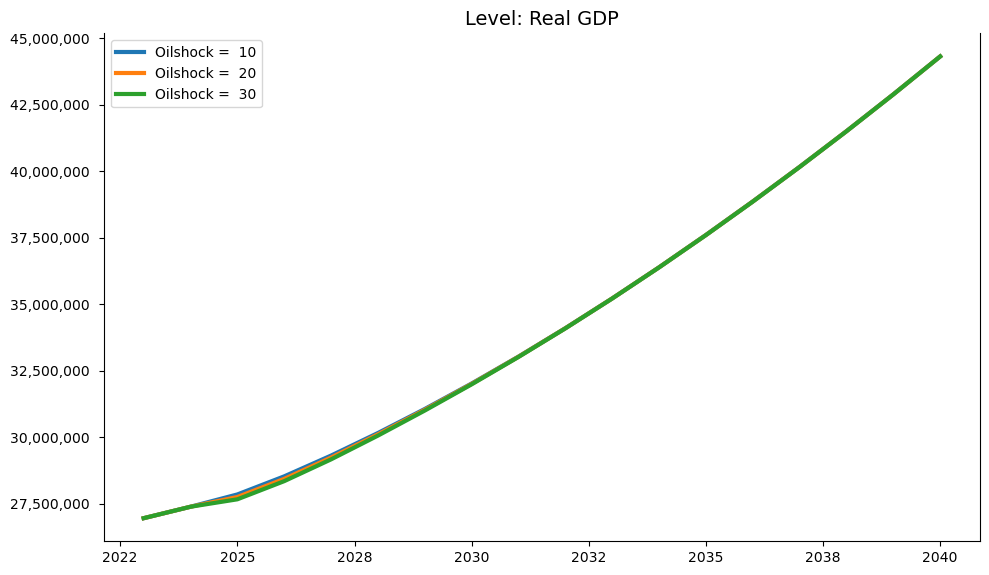

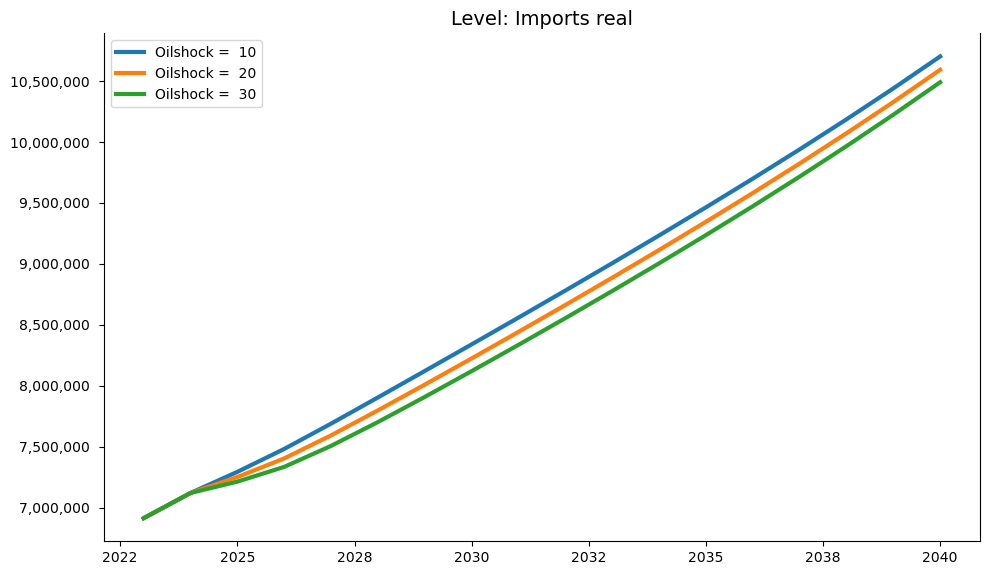

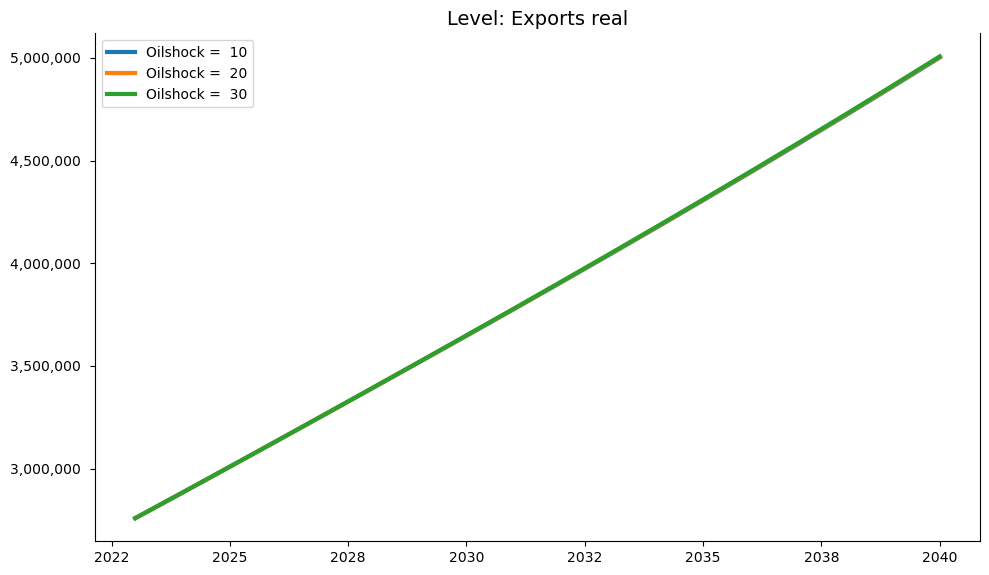

In [44]:
figdict1 =mpak.keep_plot(pat=lookat,legend=1);

### Save plots as files. 
The `.savefigs` function is used to save the plots for publication or other later use: 

The default location is `/graph`. `xopen=True` indicates that the output files are open in the browser. If that is not useful, just set xopen to False

In [29]:
mpak.savefigs(figdict1,extensions=['pdf','png'],xopen=True)

'The charts wil be saved here:c:\\modelflow manual\\papers\\mfbook\\content\\07_MoreFeatures\\graph\\experiment1'

### Growth rates `showtype='growth'`

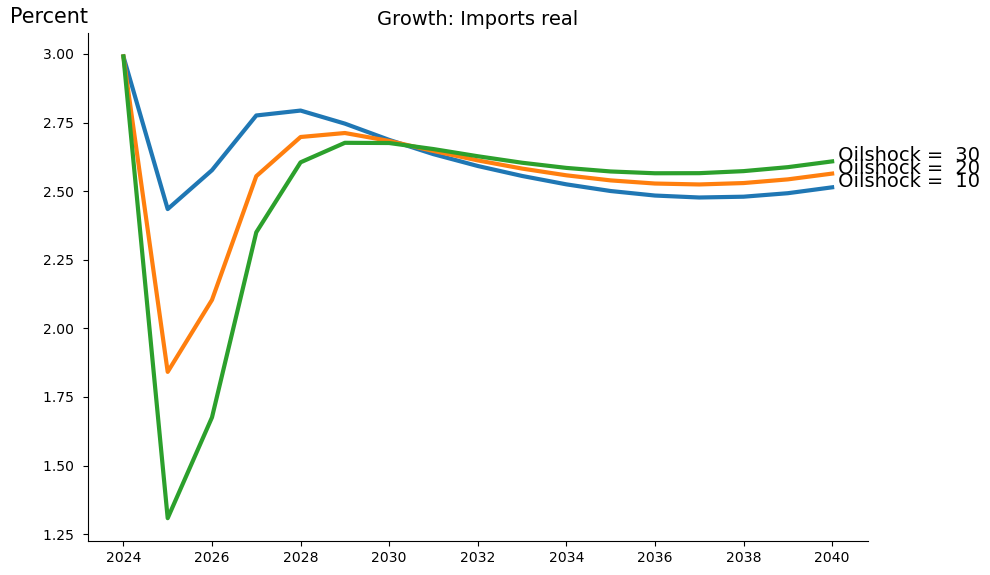

In [26]:
mpak.keep_plot(pat='PAKNEIMPGNFSKN',showtype='growth',legend=0);

### Yearly changes ´showtype='changes'´

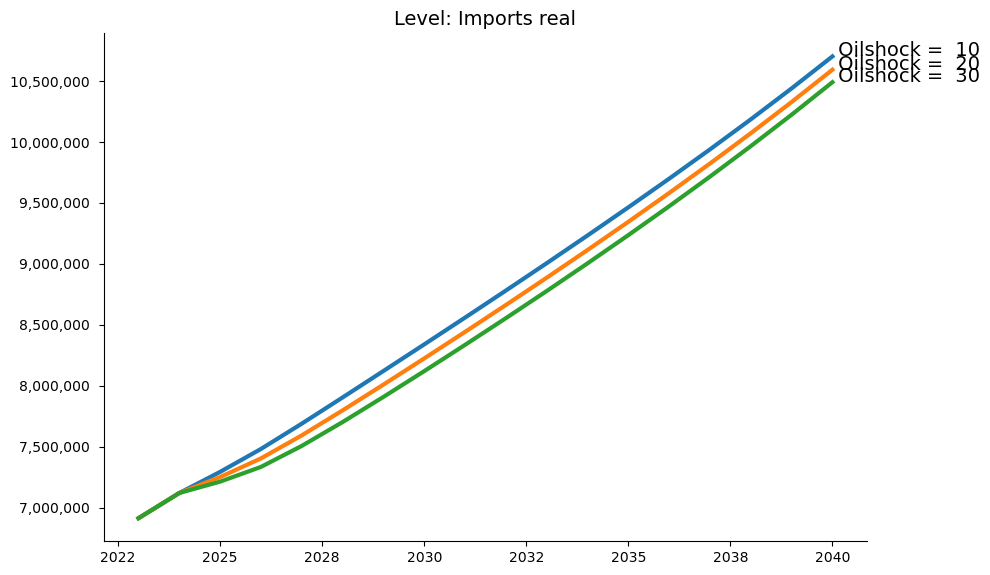

In [27]:
mpak.keep_plot(pat='PAKNEIMPGNFSKN',showtype='changes',legend=0);

### Scenario for each variable. 


In [41]:
mpak.df_show()

### Multiple charts in one figure ´.keep_plot_multi´
Works like ´.keep_plot´

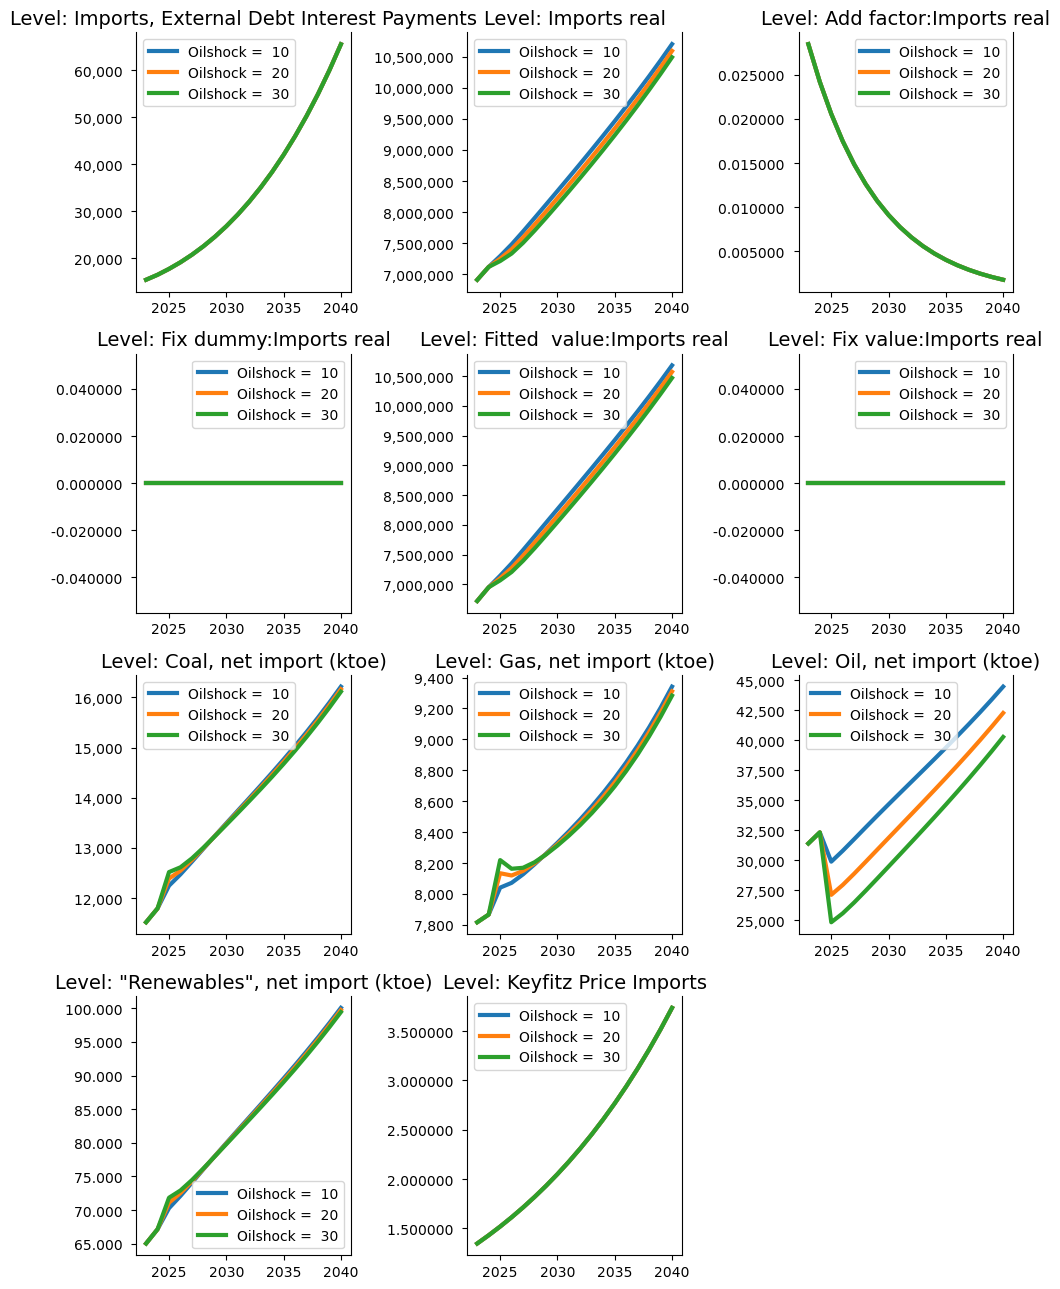

{'multifig': <Figure size 1000x1300 with 11 Axes>}

In [36]:
mpak.keep_plot_multi('!*import*',legend=1,keep_dim=True,dataonly = 0,savefig=False,size=(10,13),ncol=3,title='')

### Example 

In [13]:
mpak.keep_description = {}

_ = mpak(baseline,2020,2100,keep='Baseline') 

scenario_20  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 20")
_ = mpak(scenario_20,2020,2100,keep='Coal, Oil and Gastax : 20') # runs the simulation

scenario_40  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 40")
_ = mpak(scenario_40,2020,2100,keep='Coal, Oil and Gastax : 40') # runs the simulation

### More on manipulating keep_solution:
[Here](../howto/experiments/create_experiment.ipynb)

####  .keepswitch(), select scenarios for plotting
When creating many scenarios with the ```keep``` keyword it can sometime be useful to: 
- Plot selected scenarios and to change the sequence of the scenarios. 
- To use the .basedf and .lastdf as scenarios. 

To facilitate this the .keepswitch function has been created.

| Parameter |Explanation
| :- | :---|
|switch = True\|False(default) |If True use the .basedf and .lastdf 
|scenario='\<string>'|Listing of scenarios separated by `\|` if no wildcards else space  
    
.keepswitch is a [context manager](https://www.pythontutorial.net/advanced-python/python-context-managers) like .set_smpl.
So it works in the scope of a ```with```. After the with statement the keept solutions are restored.

```
with mpak.keepswitch(scenarios = '\<selection>'):
   mpak.keep_plot('\<variable selection>',,)
```

#### .keep_plot(), plot the scenarios
This is a very agile function which can produce visualization of the keep't solutions


#### .keep_plot parameters

| Parameter       | Type            | Description                                                                                      |
|-----------------|-----------------|--------------------------------------------------------------------------------------------------|
| `pat`           | string          | Pattern for variable selection. Defaults to '*'.                                                  |
| `start`         | TYPE            | Start period for the plot. Defaults to ''.                                                        |
| `end`           | TYPE            | End period for the plot. Defaults to ''.                                                          |
| `start_ofset`   | int             | Relative offset for the start period from the current period. Defaults to 0.                      |
| `end_ofset`     | int             | Relative offset for the end period from the current period. Defaults to 0.                        |
| `showtype`      | str             | Type of data transformation ('level', 'growth', or 'change'). Defaults to 'level'.                |
| `diff`          | bool            | If True, shows the difference to the first experiment. Defaults to False.                         |
| `diffpct`       | bool            | If True, shows the difference in percent to the first experiment. Defaults to False.              |
| `mul`           | float           | Multiplier for the data. Defaults to 1.0.                                                         |
| `title`         | str            | Title for the plot. Defaults to 'Show variables'.                                                 |
| `legend`        | bool            | If False, explanations are displayed to the right of the curve. Defaults to True.                 |
| `scale`         | str            | Scale of the plot ('log' or 'linear'). Defaults to 'linear'.                                      |
| `yunit`         | str            | Units for the y-axis. Defaults to ''.                                                             |
| `ylabel`        | str            | Label for the y-axis. Defaults to ''.                                                             |
| `dec`           | TYPE            | Number of decimals to display, automated if ''. Defaults to ''.                                   |
| `trans`         | dict            | Translation dictionary for variable names. Defaults to {}.                                        |
| `showfig`       | bool            | If False, the figure is not displayed. Defaults to True.                                          |
| `vline`         | list of tuples  | List of (time, text) for vertical lines on the plot. To erase, delete `model.vline`.              |
| `savefig`       | string          | Folder to save figures in, creates the folder if needed.                                          |
| `keep_dim`      | bool            | If True, each line represents a scenario; if False, each line represents a variable. Defaults to True. |
| `dataonly`      | bool            | If True, only the resulting data frames are returned, no plot is shown. Defaults to False.        |

 Returns

- `figs`: dict - Dictionary of the generated Matplotlib figures.

 Example Usage

```python
# Customize the plot for specific variables, periods, and additional settings
model.keep_plot(pat='GDP*', start='2020Q1', end='2030Q4', scale='log', savefig='plots/')


## Plot four separate plots of multiple series in grid   

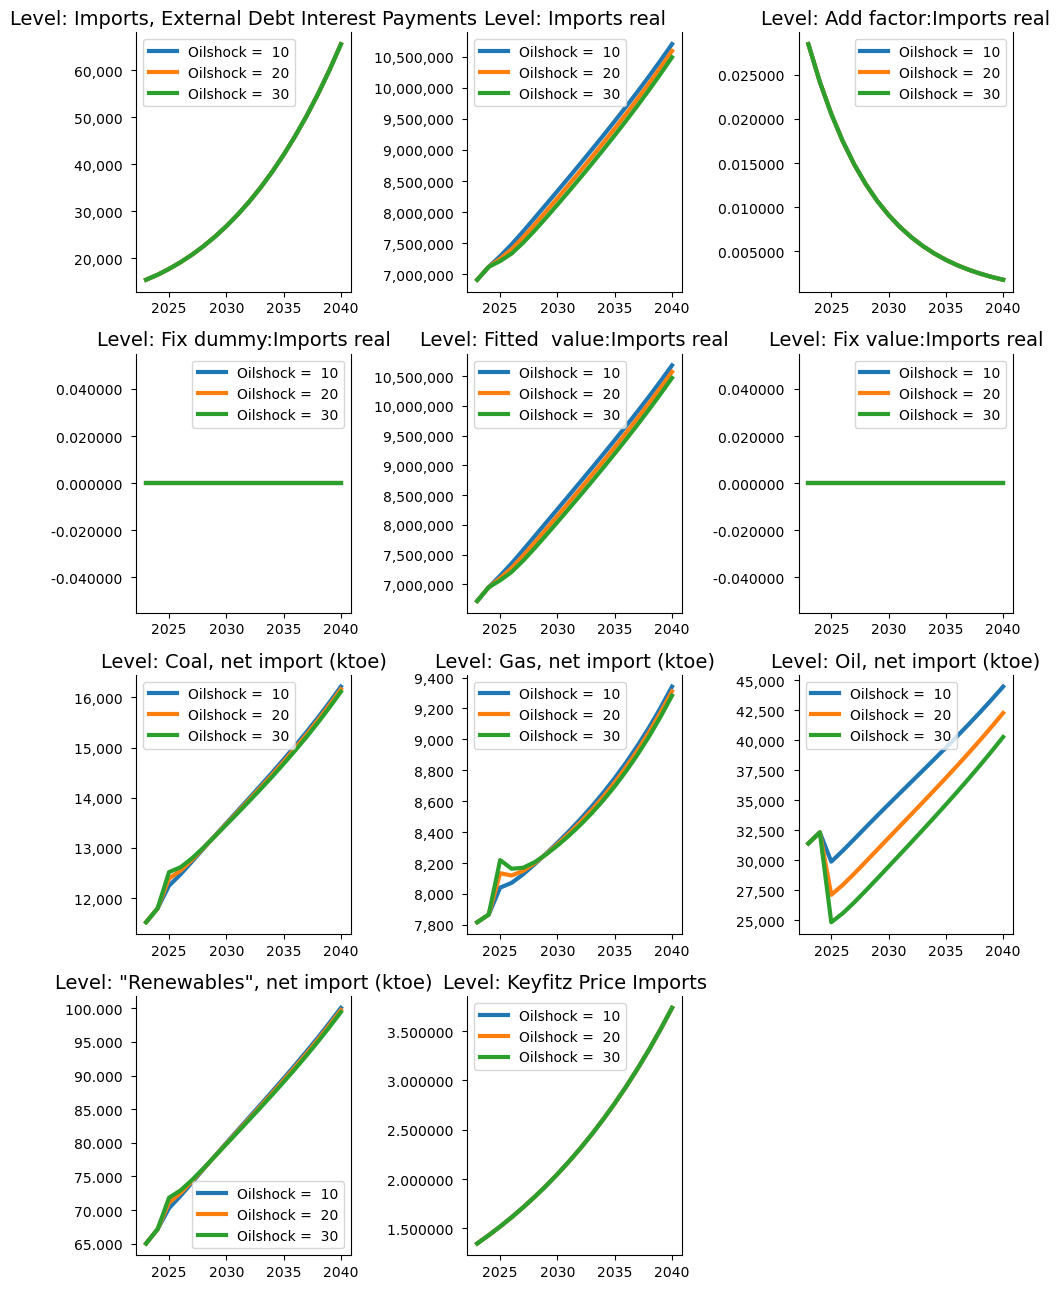

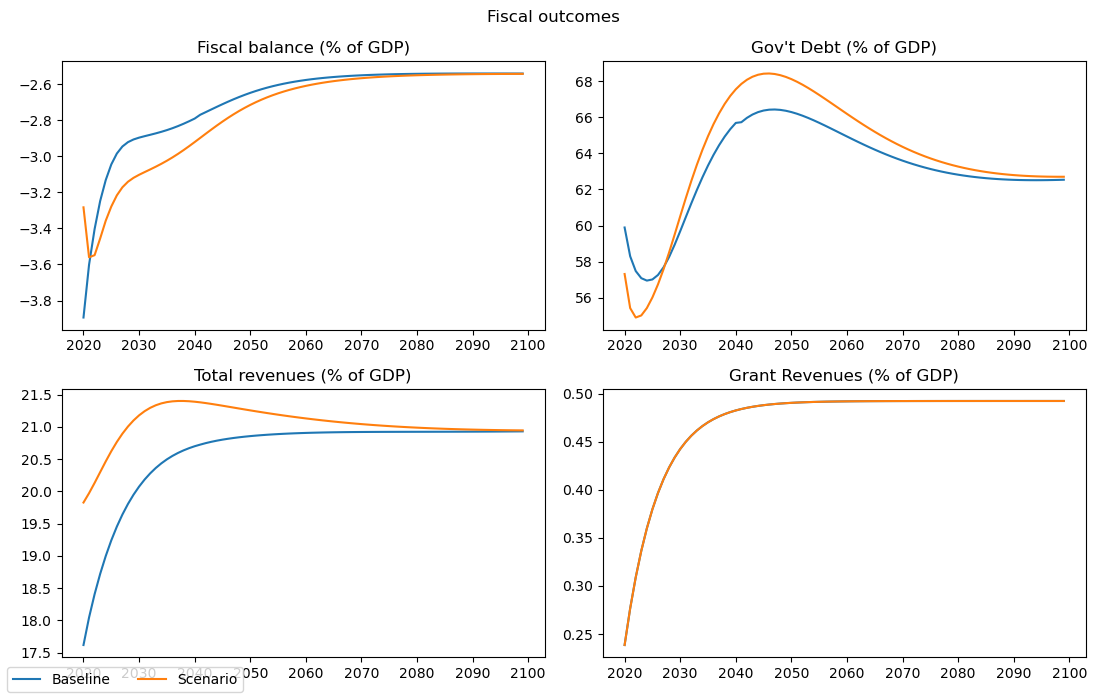

In [14]:
figure,axs= plt.subplots(2,2,figsize=(11, 7))
axs[0,0].plot(mpak.basedf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Baseline')
axs[0,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Scenario')
#axs[0,0].legend()

axs[0,1].plot(mpak.basedf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Baseline')
axs[0,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Scenario')

axs[1,0].plot(mpak.basedf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[1,1].plot(mpak.basedf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')
#axs2[4].plot(mpak.lastdf.loc[2000:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2000:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[0,0].title.set_text("Fiscal balance (% of GDP)")
axs[0,1].title.set_text("Gov't Debt (% of GDP)")
axs[1,0].title.set_text("Total revenues (% of GDP)")
axs[1,1].title.set_text("Grant Revenues (% of GDP)")
figure.suptitle("Fiscal outcomes")

plt.figlegend(['Baseline','Scenario'],loc='lower left',ncol=5)  
figure.tight_layout(pad=2.3) #Ensures legend does not overlap dates
figure;